<a href="https://colab.research.google.com/github/jvfaria-dev/Deep-Learning-parte-1-Keras/blob/main/projeto1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

np.uint8(9)


Exibição dos dados

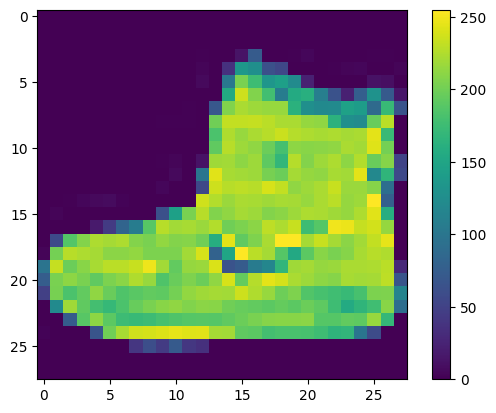

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando e treinando o modelo

In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(32, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7190 - loss: 0.8244 - val_accuracy: 0.8522 - val_loss: 0.4154
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8456 - loss: 0.4363 - val_accuracy: 0.8574 - val_loss: 0.3985
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8649 - loss: 0.3762 - val_accuracy: 0.8646 - val_loss: 0.3789


Salvando o modelo


In [1]:
modelo.save('modelo.h5')
modelo_save = load_model('modelo.h5')

NameError: name 'modelo' is not defined

Plotando gráfico Acurácia

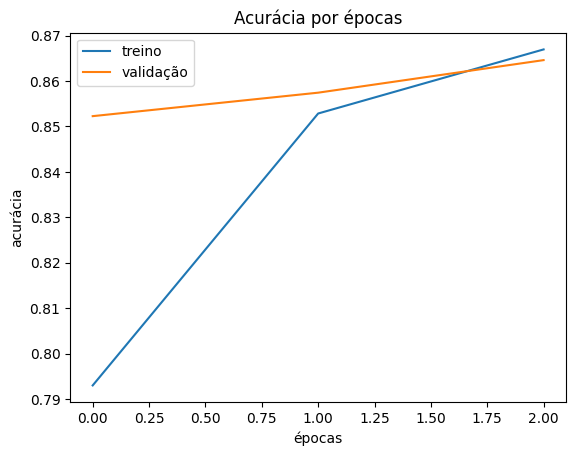

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Plotando gráfico LOSS

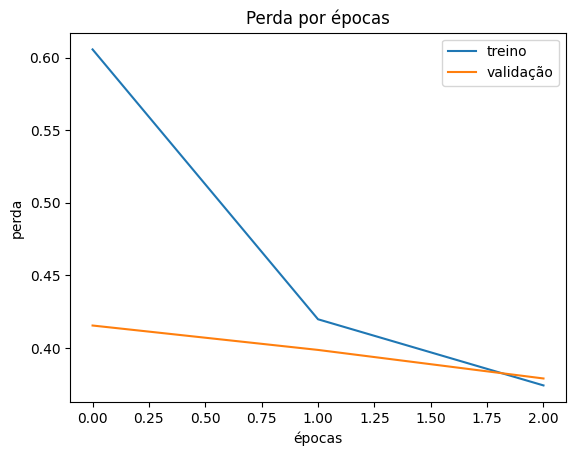

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo

In [29]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[4]))
print('número da imagem de teste:', identificacoes_teste[4])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[4]))
print('número da imagem de teste:', identificacoes_teste[4])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
resultado teste: 6
número da imagem de teste: 6
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste modelo salvo: 6
número da imagem de teste: 6


Avaliando o modelo

In [30]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8582 - loss: 48.6655
Perda do teste: 51.691986083984375
Acurácia do teste: 0.854200005531311
